In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext("local", "pyspark-shell")

# PySpark SQL & DataFrames

## Abstracting Data with DataFrames

PySpark SQL is a Spark library for structured data. It provides a programming abstraction called DataFrames. A dataframe is an immutable distributed collection of data with named columns. They are designed for processing both structured data such as relational database and semi-structured data such as JSON. 

SparkContext is the main entry point for creating RDDs. SparkSession provides a single point of entry to interact with Spark DataFrames. The SparkSession does for DataFrames what the SparkContext does for RDDs. A SparkSession can be used to create DataFrame, register DataFrames or execute SQL queries. 

Dataframes can created either from existing RDDs or from various data sources(CSV, JSON, TXT).

Schema controls the data and halps DataFrames to optimize queries. Schema provides information about column name, type of data in the column, empty values, etc.

To create a DataFrame from an RDD, RDD and schema are needed to be passes into SparkSession's createDataFrame method.

To create from files, use the SparkSession's .read property. By setting inferSchema to True, it will attempt to assign the right datatype to each column based on the content.

### RDD to DataFrame

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

rdd = sc.parallelize(sample_list)
names_df = spark.createDataFrame(rdd, schema=["Name", "Age"])

print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [4]:
names_df.show()

+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 20|
|Jennifer| 34|
|    John| 20|
|     Jim| 26|
+--------+---+



### Loading CSV into DataFrame

In [5]:
people_df = spark.read.csv("people.csv", header=True, inferSchema=True)

print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [8]:
people_df.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

## Operating on DataFrames in PySpark

PySpark DataFrame provides operations to filter, group or compute aggregates, and can be used with PySpark SQL. Some of the transformations are select, filter, groupby, orderby, dropduplicates and withColumnRenamed. Some actions are head, show, count and describe.

    select(): subsets the columns in the DataFrame
    show(): prints the first 20 rows in the DataFrame
    filter(): select only rows that pass the condition specified
    groupby(): groups using the specified columns to run aggregations
    orderby(): sorts the DataFrame based on one or more columns
    dropDuplicates(): removes the duplicate rows of a DataFrame
    withColumnRenamed(): renaming a column 
    printSchema(): prints the types of columns in the DataFrame
    .columns: prints the columns of a DataFrame
    .describe(): compute summary statistics of numerical columns

### Inspecting data in PySpark DataFrame


In [16]:
people_df.show(10)

print("There are {} rows in the people_df DataFrame.".format(people_df.count()))
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


### PySpark DataFrame subsetting and cleaning


In [17]:
people_df_sub = people_df.select("name", "sex", "date of birth")
people_df_sub.show(10)

people_df_sub_nodup = people_df_sub.dropDuplicates()

print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


### Filtering your DataFrame

In [18]:
people_df_female = people_df.filter(people_df.sex == "female")
people_df_male = people_df.filter(people_df.sex == "male")

print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


## Interacting with DataFrames using PySpark SQL

PySpark SQL allows you to manipulate DataFrames with SQL queries. The SparkSession provides a method called sql which can be used to execute a SQL query. Before that you need to leverage the createOrReplaceTempView function to build a temporary table. 

### Running SQL Queries Programmatically

In [22]:
people_df.createOrReplaceTempView("people")

query = "SELECT name FROM people"
people_df_names = spark.sql(query)

people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



### SQL queries for filtering Table

In [23]:
people_female_df = spark.sql("SELECT * FROM people WHERE sex == 'female'")

people_male_df = spark.sql("SELECT * FROM people WHERE sex == 'male'")

print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## Data Visualization in PySpark using DataFrames

Three different methods available to create charts using PySpark DataFrames: pyspark_dist_explore library, toPandas method and HandySpark library.

pyspark_dist_explore is a plotting library to get quick insights on data in PySpark DataFrames. hist(), distplot() and pandas_histogram() are available in pyspark_dist_explore. 

Second method is converting PySpark DataFrame into a Pandas DataFrame. After that matplotlib and seaborn can be used. Pandas won't work in every case since it is in-memory and a single machine tool.

HandySpark is a new package. After creating the DataFrame, it is converted to a HandySpark DataFrame using the toHandy method.

### PySpark DataFrame visualization

The column names of names_df are ['Name', 'Age']


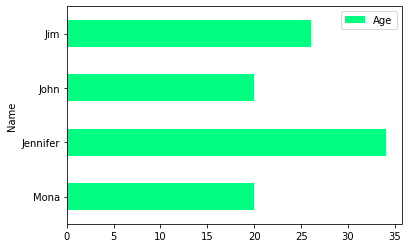

In [46]:
import matplotlib.pyplot as plt
names_df = spark.read.csv("names_df.csv", header=True, inferSchema=True)

print("The column names of names_df are", names_df.columns)
df_pandas = names_df.toPandas()
df_pandas.plot(kind="barh", x="Name", y="Age", colormap='winter_r')
plt.show()

### Part 1: Create a DataFrame from CSV file

In [47]:
fifa_df = spark.read.csv("Fifa2018_dataset.csv", header=True, inferSchema=True)

fifa_df.printSchema()
fifa_df.show(10)
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


### Part 2: SQL Queries on DataFrame


In [51]:
fifa_df.createOrReplaceTempView("fifa_df_table")
query = "SELECT Age FROM fifa_df_table WHERE Nationality == 'Germany'"
fifa_df_germany_age = spark.sql(query)

fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



### Part 3: Data visualization


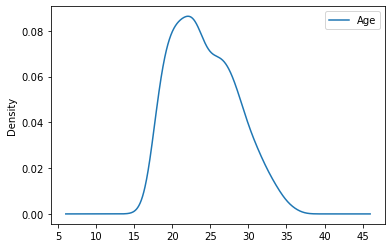

In [52]:
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

fifa_df_germany_age_pandas.plot(kind="density")
plt.show()